In [1]:
import time
import sys
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter
import hcipy
from hcipy import *

from astropy.io import fits
print(fits)

import os, sys
os.chdir("/home/lab/maygut/keckAOSim/keckSim")
sys.path.insert(0, os.path.join(os.getcwd(), "simulations_codes"))
os.environ["OOPAO_PATH"]="/home/lab/maygut/OOPAO"
sys.path.insert(0, "/home/lab/maygut/OOPAO")

from OOPAO.calibration.getFittingError import *
from OOPAO.calibration.CalibrationVault import CalibrationVault
from OOPAO.OPD_map import OPD_map
from OOPAO.calibration.compute_KL_modal_basis import compute_KL_basis
from scipy.ndimage import center_of_mass
from scipy.optimize import curve_fit

import importlib
from KAO_parameter_file import initializeParameterFile
from initialize_AO import initialize_AO_hardware
import close_loop_coro
from close_loop_coro import close_loop
importlib.reload(close_loop_coro)

<module 'astropy.io.fits' from '/home/lab/anaconda3/envs/KAO_MG/lib/python3.10/site-packages/astropy/io/fits/__init__.py'>


     °          *      *      
 ▄██▄   ▄██▄  ▄███▄   ▄██▄ * ▄██▄ 
██* ██ ██  ██ ██  ██ ██  ██ ██  ██
██  ██ ██° ██ ██  ██ ██* ██ ██  ██
██  ██ ██  ██ ████▀  ██▄▄██ ██  ██
██* ██ ██  ██ ██     ██▀▀██ ██  ██
██  ██ ██  ██ ██ *   ██  ██ ██* ██
 ▀██▀   ▀██▀  ██   ° ██  ██  ▀██▀ 
      *         *             




<module 'close_loop_coro' from '/home/lab/maygut/keckAOSim/keckSim/simulations_codes/close_loop_coro.py'>

OOPAO Warning: 
User-defined pupil, the central obstruction will not be taken into account...

------------ Telescope -------------
Diameter [m]             |  10.93   
Resolution [px]          |   336    
Pixel size [m]           |   0.03   
Surface [m²]             |  72.15   
Central obstruction [%]  |    0     
Pixels in pupil          |  68184   
Field of view [arcsec]   |   0.00   
------------------------------------


------------- Source --------------
Source                   |   NGS   
Wavelength [m]           | 6.4e-07 
Zenith [arcsec]          |  0.00   
Azimuth [°]              |  0.00   
Altitude [m]             |   inf   
Magnitude                |  5.00   
Flux [photon/m²/s]       | 1.1e+08 
Coordinates [arcsec,deg] | [0,0]
-----------------------------------


------------- Source --------------
Source                   |   NGS   
Wavelength [m]           | 2.2e-06 
Zenith [arcsec]          |  0.00   
Azimuth [°]              |  0.00   
Altitude [m]             |   in

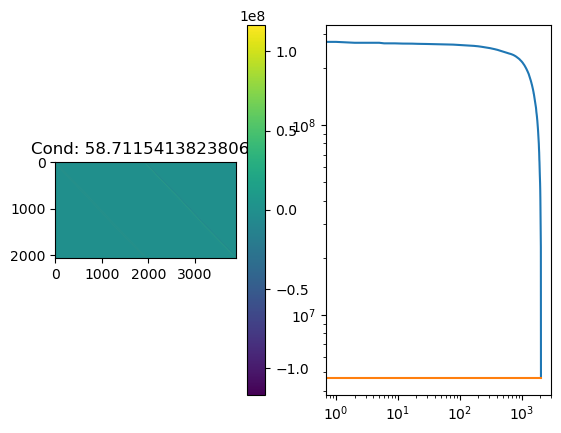

Everything has been loaded and the calibration are done!


In [2]:
param = initializeParameterFile()
KAO = initialize_AO_hardware(param)

M1_opd = KAO.opd_M1.OPD #optical path difference on primary mirror
ncpa = KAO.opd_ncpa.OPD #non-common path abberations
jitter_x = KAO.jitter.x #tip-tilt jitter along x-axis

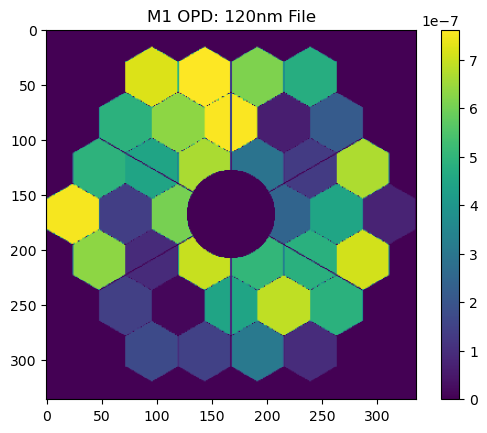

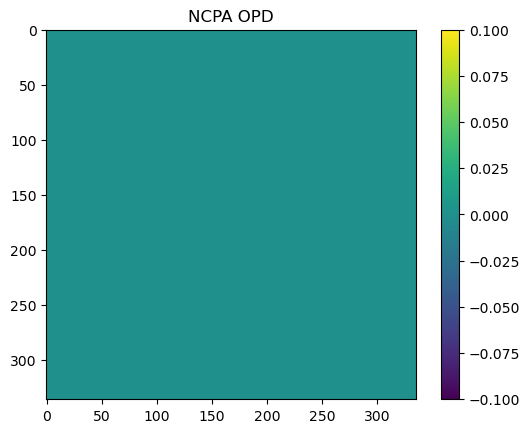

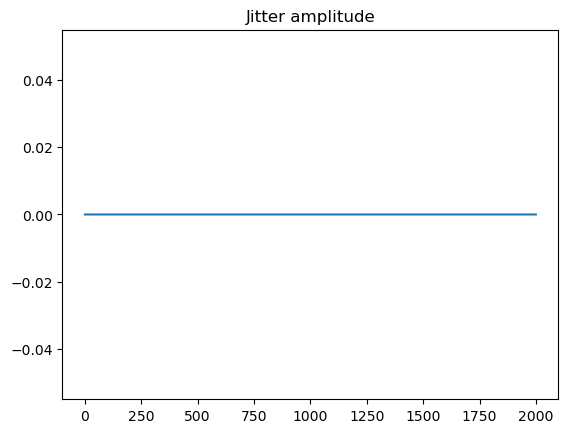

"\nplt.figure()\nplt.imshow(np.reshape(np.sum(KAO.dm.modes**5,axis=1),[KAO.tel.resolution,KAO.tel.resolution]).T +\n            KAO.tel.pupil,extent=[-KAO.tel.D/2,KAO.tel.D/2,-KAO.tel.D/2,KAO.tel.D/2])\nplt.plot(KAO.dm.coordinates[:,0],KAO.dm.coordinates[:,1],'rx')\nplt.xlabel('[m]')\nplt.ylabel('[m]')\nplt.title('DM Actuator Coordinates keck')\nplt.colorbar()\nplt.show()\n\nplt.figure(), plt.plot(KAO.calib_zonal.eigenValues,'rx'), plt.ylabel('eigenValues zonal'), plt.show(block=False)\nplt.figure(), plt.imshow(KAO.calib_zonal.D), plt.colorbar(), plt.title('Zonal Imat'), plt.show(block=False)\n\nKAO.tel+KAO.atm\nKAO.ngs * KAO.tel * KAO.wfs\nplt.figure(), plt.imshow(KAO.wfs.signal_2D), plt.colorbar(), plt.title('Slopes'), plt.show(block=False)\n\nprint(f'Incoming photon on WFS {np.sum(KAO.wfs.signal)}')"

In [3]:
plt.figure(), plt.imshow(KAO.opd_M1.OPD), plt.colorbar(), plt.title('M1 OPD: 120nm File'), plt.show()
plt.figure(), plt.imshow(KAO.opd_ncpa.OPD), plt.colorbar(), plt.title('NCPA OPD'), plt.show()
plt.figure(), plt.plot(jitter_x), plt.title('Jitter amplitude'), plt.show()
'''
plt.figure()
plt.imshow(np.reshape(np.sum(KAO.dm.modes**5,axis=1),[KAO.tel.resolution,KAO.tel.resolution]).T +
            KAO.tel.pupil,extent=[-KAO.tel.D/2,KAO.tel.D/2,-KAO.tel.D/2,KAO.tel.D/2])
plt.plot(KAO.dm.coordinates[:,0],KAO.dm.coordinates[:,1],'rx')
plt.xlabel('[m]')
plt.ylabel('[m]')
plt.title('DM Actuator Coordinates keck')
plt.colorbar()
plt.show()

plt.figure(), plt.plot(KAO.calib_zonal.eigenValues,'rx'), plt.ylabel('eigenValues zonal'), plt.show(block=False)
plt.figure(), plt.imshow(KAO.calib_zonal.D), plt.colorbar(), plt.title('Zonal Imat'), plt.show(block=False)

KAO.tel+KAO.atm
KAO.ngs * KAO.tel * KAO.wfs
plt.figure(), plt.imshow(KAO.wfs.signal_2D), plt.colorbar(), plt.title('Slopes'), plt.show(block=False)

print(f'Incoming photon on WFS {np.sum(KAO.wfs.signal)}')'''

/tmp/ipykernel_163106/3560698473.py:10: RuntimeWarning: invalid value encountered in power
  plt.figure(), plt.imshow(PSF_diff[size_psf-wind:size_psf+wind,size_psf-wind:size_psf+wind]**0.2), plt.colorbar(), plt.title('Diffraction limited PSF'), plt.show()


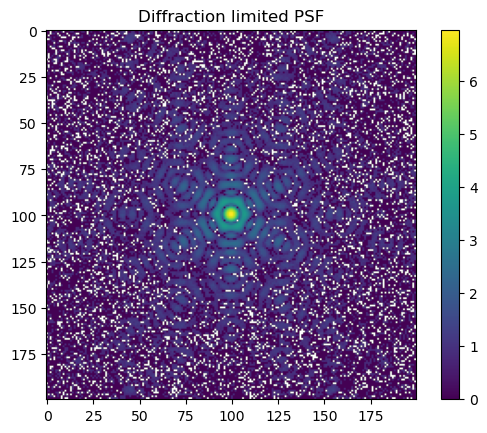

/tmp/ipykernel_163106/3560698473.py:11: RuntimeWarning: invalid value encountered in power
  plt.figure(), plt.imshow(PSF_ncpa[size_psf-wind:size_psf+wind,size_psf-wind:size_psf+wind]**0.2), plt.colorbar(), plt.title('NCPA PSF'), plt.show()


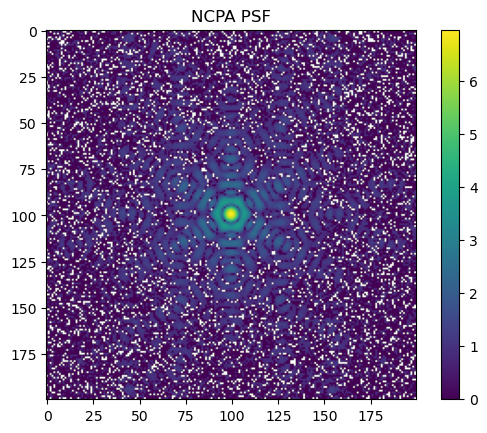

(<Figure size 640x480 with 2 Axes>,
 Text(0.5, 1.0, 'NCPA PSF'),
 None)

In [4]:
# %% -----------------------     plot PSF  ----------------------------------

# diff at the science wavelength
LD = KAO.science.wavelength/KAO.tel.D * 206265 * 1000 # in mas

PSF_diff = KAO.PSF_diff
PSF_ncpa = KAO.PSF_ncpa
size_psf = PSF_diff.shape[0]//2
wind = 100
plt.figure(), plt.imshow(PSF_diff[size_psf-wind:size_psf+wind,size_psf-wind:size_psf+wind]**0.2), plt.colorbar(), plt.title('Diffraction limited PSF'), plt.show()
plt.figure(), plt.imshow(PSF_ncpa[size_psf-wind:size_psf+wind,size_psf-wind:size_psf+wind]**0.2), plt.colorbar(), plt.title('NCPA PSF'), plt.show()

Re-initializing WFS...
Acquiring reference slopes..
updating the flux of the SHWFS object
Done!
Setting slopes units..
Done!
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% SHACK HARTMANN WFS %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    Subapertures            56        
  Subaperture Size         0.2               [m]        
     Pixel FoV             0.68            [arcsec]     
   Subapertue FoV          2.71            [arcsec]     
 Valid Subaperture         1936       
   Binning Factor           1         
   Spot Sampling           1.0            [pix/FWHM]    
   Geometric WFS          False       
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Flux updated, magnitude is  5 and flux is 1.09e+08
Flux updated, magnitude is  5 and flux is 1.90e+07
Telescope and Atmosphere combined!
updating the flux of the SHWFS object


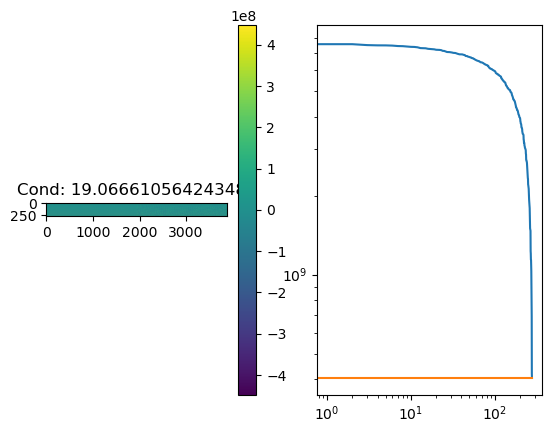

AO_sys has attributes: ['IF', 'M2C', 'M2C_TTM', 'PSF_diff', 'PSF_ncpa', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'atm', 'basis', 'calib_TTM', 'calib_modal', 'calib_zonal', 'detector_type', 'dm', 'filter_Piston', 'filter_TTM', 'jitter', 'keck_reconstructor', 'ksm', 'matching_inds', 'name_basis', 'ngs', 'opd_M1', 'opd_jitter', 'opd_ncpa', 'param', 'proj_seg', 'projector_dm', 'projector_modal', 'science', 'science_detector', 'seg1D', 'seg2D', 'tel', 'ttm', 'wfs', 'zwfs']
Loop0/200 Turbulence: 1472.4084623909966 -- Residual:1472.4084623909966 -- Fitting:134.81345710930123 -- SR:1.4837552192113989e-08

AO_sys has attributes: ['IF', 'M2C', 'M2C_TTM', 'PSF_diff', 'PSF_ncpa', '__class__', '__dela

In [5]:
KAO.param['print_display'] =True
KAO.param['nLoop']=200

AO_output_modal,L_psf,L_coro = close_loop(KAO)
SR_mode = AO_output_modal['SR']
res_mode = AO_output_modal['residual']
PSF_LE_mode = AO_output_modal['PSF_LE']
PSF_coro_mode = AO_output_modal['PSF_coro']

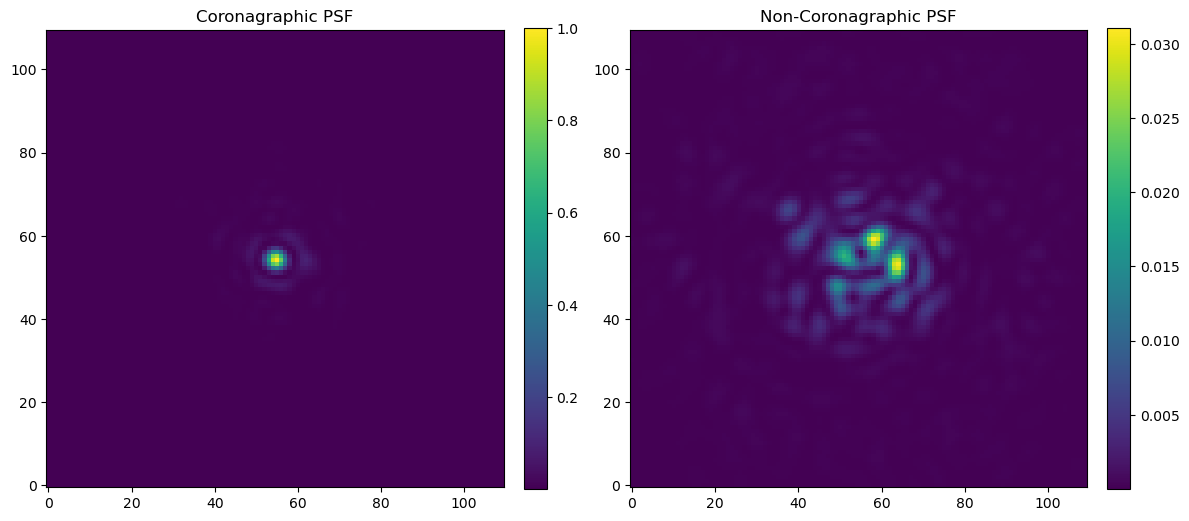

'\nfig, axs = plt.subplots(1, 2, figsize=(12,6))\npsf=np.sum(L_psf, axis=0)\ncoro=np.sum(L_coro, axis=0)\nim1 = axs[0].imshow(d2/np.max(d2), origin="lower", cmap="viridis")#, norm=plt.matplotlib.colors.LogNorm())\nfig.colorbar(im1, ax=axs[0], fraction=0.046, pad=0.04)\naxs[0].set_title("Coronagraphic PSF")\n\nim2 = axs[1].imshow(d1/np.max(d2), origin="lower", cmap="viridis")#, norm=plt.matplotlib.colors.LogNorm())\nfig.colorbar(im2, ax=axs[1], fraction=0.046, pad=0.04)\naxs[1].set_title("Non-Coronagraphic PSF")\n\nplt.tight_layout()\nplt.show()\n'

In [7]:
#f1 = "/Users/mayragutierrez/keckAOSim/keckSim/simulations_codes/MGDATA/L_current_coro_120nm_mag5_1760320722938146_20s_sum.fits"
#f2 = "/Users/mayragutierrez/keckAOSim/keckSim/simulations_codes/MGDATA/L_current_psf_120nm_mag5_1760320722938146_20s_sum.fits"

#d1 = fits.getdata(f1)
#d2 = fits.getdata(f2)

fig, axs = plt.subplots(1, 2, figsize=(12,6))
psf=np.sum(L_psf, axis=0)
coro=np.sum(L_coro, axis=0)
im1 = axs[0].imshow(psf/np.max(psf), origin="lower", cmap="viridis")#, norm=plt.matplotlib.colors.LogNorm())
fig.colorbar(im1, ax=axs[0], fraction=0.046, pad=0.04)
axs[0].set_title("Coronagraphic PSF")

im2 = axs[1].imshow(coro/np.max(psf), origin="lower", cmap="viridis")#, norm=plt.matplotlib.colors.LogNorm())
fig.colorbar(im2, ax=axs[1], fraction=0.046, pad=0.04)
axs[1].set_title("Non-Coronagraphic PSF")

plt.tight_layout()
plt.show()
'''
fig, axs = plt.subplots(1, 2, figsize=(12,6))
psf=np.sum(L_psf, axis=0)
coro=np.sum(L_coro, axis=0)
im1 = axs[0].imshow(d2/np.max(d2), origin="lower", cmap="viridis")#, norm=plt.matplotlib.colors.LogNorm())
fig.colorbar(im1, ax=axs[0], fraction=0.046, pad=0.04)
axs[0].set_title("Coronagraphic PSF")

im2 = axs[1].imshow(d1/np.max(d2), origin="lower", cmap="viridis")#, norm=plt.matplotlib.colors.LogNorm())
fig.colorbar(im2, ax=axs[1], fraction=0.046, pad=0.04)
axs[1].set_title("Non-Coronagraphic PSF")

plt.tight_layout()
plt.show()
'''

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Replace with your actual filename
strehl_file = "/Users/mayragutierrez/keckAOSim/keckSim/simulations_codes/MGDATA/strehl_K_current_120nm_mag5_1759662621887816.npy"

strehl = np.load(strehl_file)

plt.figure(figsize=(8,5))
plt.plot(strehl, color="royalblue")
plt.xlabel("Iteration")
plt.ylabel("Strehl ratio")
plt.title("AO Strehl evolution")
plt.grid(True)
plt.show()

print("Final Strehl:", strehl[-1])
print("Mean Strehl:", np.mean(strehl))


In [ ]:
import numpy as np

strehl = np.load(strehl_file)

n_frames = len(strehl)
dt = 0.001  # seconds per frame from param['samplingTime']
t_exp = n_frames * dt

print(f"Frames: {n_frames}")
print(f"Total exposure time: {t_exp:.2f} s")
